In [1]:
#Importar librerías necesarias
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Cargar datos de clasificación de productos desde dataset creado previamente en Azure Machine Learning

# azureml-core of version 1.0.72 or higher is required
from azureml.core import Workspace, Dataset

subscription_id = '1d86fb2e-0dc9-4639-b35b-fc2dfac4e193'
resource_group = 'Recurso1'
workspace_name = 'ML_fco'

workspace = Workspace(subscription_id, resource_group, workspace_name)

dataset2= Dataset.get_by_name(workspace, name='DT_PRODUCTOS')
productos = dataset2.to_pandas_dataframe()

In [3]:
#Seleccionar solo los productos que pertenezcan a la categoría jugos

base_de_datos_productos_categoria_jugos =  productos[productos['PR_CATEGORIA'].isin(['JUGOS Y NECTARES'])]
lista_productos_jugos = base_de_datos_productos_categoria_jugos[['ID_PRODUCTO']]

In [4]:
# Cargar datos de venta desde dataset creado previamente en Azure Machine Learning

# azureml-core of version 1.0.72 or higher is required
# azureml-dataprep[pandas] of version 1.1.34 or higher is required
from azureml.core import Workspace, Dataset

subscription_id = '1d86fb2e-0dc9-4639-b35b-fc2dfac4e193'
resource_group = 'Recurso1'
workspace_name = 'ML_fco'

workspace = Workspace(subscription_id, resource_group, workspace_name)

dataset = Dataset.get_by_name(workspace, name='VTASO2019')
vta = dataset.to_pandas_dataframe()

In [5]:
#Obtener un dataframe que contenga solo registros pertenecientes a productos de la categoría Jugos
venta_jugos = vta[vta['PRODUCTO'].isin(lista_productos_jugos['ID_PRODUCTO'])]

In [6]:
venta_jugos.head(4)

,FECHA_VENTA,SEMANA,PRODUCTO,COMUNA,VENTA
150,2019-01-02,1,305712,ÑUÑOA,40.0
151,2019-01-02,1,305712,LAS CONDES,37.0
152,2019-01-02,1,305712,PROVIDENCIA,20.0
153,2019-01-02,1,305712,LA CISTERNA,7.0


In [7]:
#Dividiendo el archivo de ventas en 2 listas de 28 y 29 productos respectivamente

subconjunto_venta_lista1 = venta_jugos[venta_jugos['PRODUCTO'].isin(venta_jugos.PRODUCTO.unique()[0:27])]
subconjunto_venta_lista2 = venta_jugos[venta_jugos['PRODUCTO'].isin(venta_jugos.PRODUCTO.unique()[28:55])]

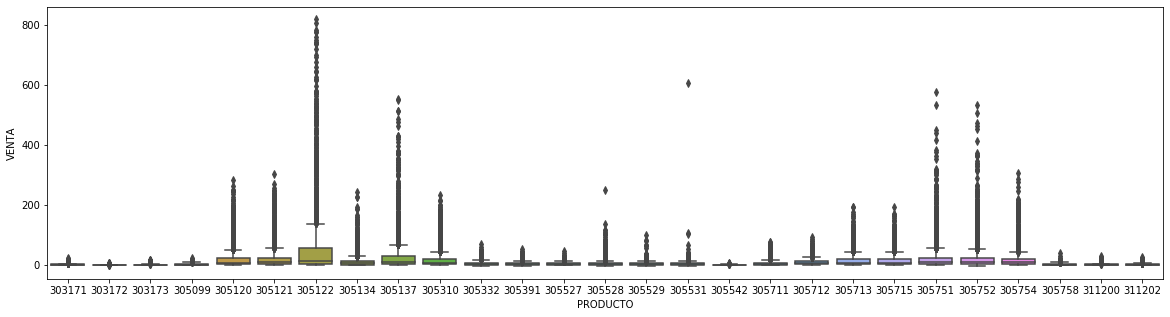

In [8]:
#Graficando boxplots (venta diaria de productos de la categoría jugos)

plt.figure(figsize=(20,5))
sns.boxplot(x="PRODUCTO", y="VENTA",   data=subconjunto_venta_lista1)

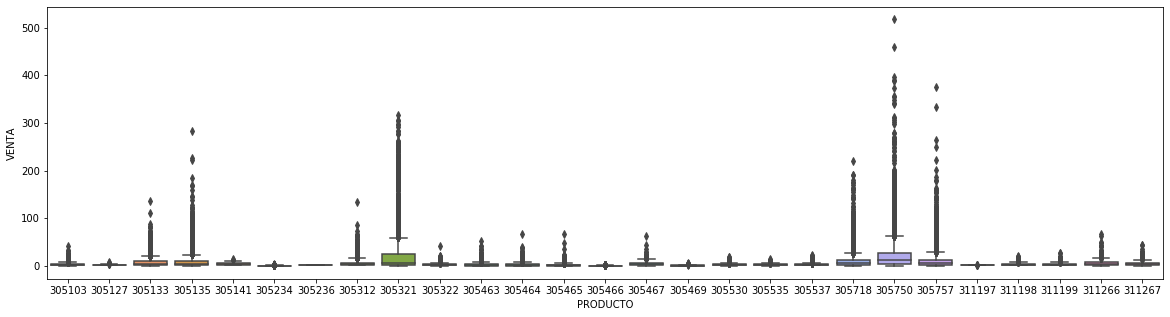

In [9]:
plt.figure(figsize=(20,5))
sns.boxplot(x="PRODUCTO", y="VENTA",   data=subconjunto_venta_lista2)

In [10]:
#Obteniendo la venta semanal de jugos 
venta_semanal = venta_jugos.groupby(['PRODUCTO','SEMANA']).sum().reset_index()

In [11]:
subconjunto_venta_semanal_lista1 = venta_semanal[venta_semanal['PRODUCTO'].isin(venta_semanal.PRODUCTO.unique()[0:27])]
subconjunto_venta_semanal_lista2 = venta_semanal[venta_semanal['PRODUCTO'].isin(venta_semanal.PRODUCTO.unique()[28:55])]

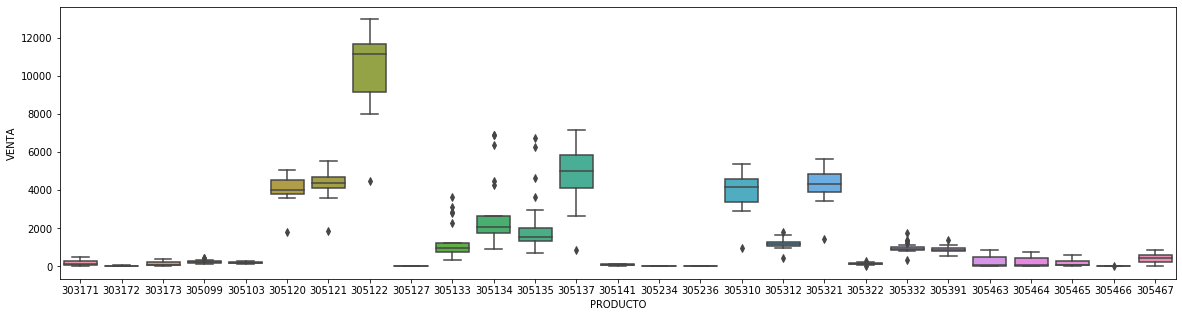

In [12]:
#Graficando ahora boxplots paraventa semanal de productos de la categoría jugos
#Se observa una menor dispersión al agrupar la venta semanalmente

#Se realizará entonces el cálculo de correlación tomando la suma de la venta semanal y el promedio semanal de temperatura

plt.figure(figsize=(20,5))
sns.boxplot(x="PRODUCTO", y="VENTA",   data=subconjunto_venta_semanal_lista1)

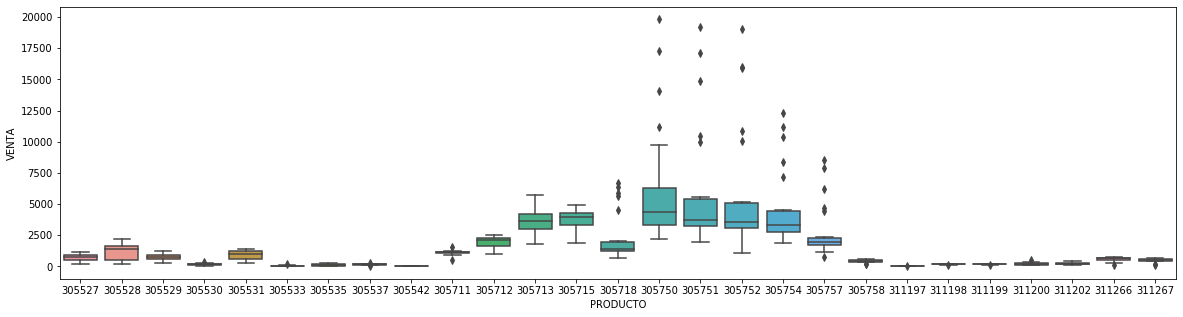

In [13]:
plt.figure(figsize=(20,5))
sns.boxplot(x="PRODUCTO", y="VENTA",   data=subconjunto_venta_semanal_lista2)

In [14]:
# Se requiere azureml-core, versión 1.0.72 o posterior
# Se requiere azureml-dataprep[pandas] (versión 1.1.34 u otra posterior).
from azureml.core import Workspace, Dataset

subscription_id = '1d86fb2e-0dc9-4639-b35b-fc2dfac4e193'
resource_group = 'Recurso1'
workspace_name = 'ML_fco'

workspace = Workspace(subscription_id, resource_group, workspace_name)

dataset = Dataset.get_by_name(workspace, name='TEMPERATURAS2019')
temperaturas_ini = dataset.to_pandas_dataframe()

In [15]:

temperaturas = temperaturas_ini[['FECHA', 'TEMPERATURA MAXIMA']]

In [16]:
temperaturas.head(3)

,FECHA,TEMPERATURA MAXIMA
0,2019-01-01,28.4
1,2019-01-02,28.9
2,2019-01-03,30.6


In [17]:
#Agregar columna SEMANA a partir de la Fecha
temperaturas.insert(2, "SEMANA", temperaturas['FECHA'].dt.week)

In [18]:
#Obtener temperatura promedio semanal
temp_semanal = temperaturas.groupby(['SEMANA']).mean().reset_index()

In [19]:
#Renombrar columna
temp_semanal.rename(columns = {'TEMPERATURA MAXIMA':'TEMP_MAX'}, inplace = True)

In [ ]:
# azureml-core of version 1.0.72 or higher is required
# azureml-dataprep[pandas] of version 1.1.34 or higher is required
from azureml.core import Workspace, Dataset

subscription_id = '1d86fb2e-0dc9-4639-b35b-fc2dfac4e193'
resource_group = 'Recurso1'
workspace_name = 'ML_fco'

workspace = Workspace(subscription_id, resource_group, workspace_name)

dataset = Dataset.get_by_name(workspace, name='VTA_TEMP_SEMANAL')
vta_y_temp_semanal = dataset.to_pandas_dataframe()

In [21]:
#Unir venta y temperatura mediante Join
vta_y_temp_semanal = pd.concat([venta_semanal, temp_semanal], axis=1)

In [22]:
productos_lista = vta_y_temp_semanal.PRODUCTO.unique()

In [23]:
cant_productos = len(productos_lista)

In [24]:
vtaprod1 = vta_y_temp_semanal[vta_y_temp_semanal['PRODUCTO'].isin(['305712'])]

In [25]:
vtaprod1.corr()

,SEMANA,VENTA,TEMP_MAX
SEMANA,1.000000,0.300166,-0.102403
VENTA,0.300166,1.000000,0.717564
TEMP_MAX,-0.102403,0.717564,1.000000


In [26]:
print('Producto' + '   ' + 'Correlación Entre Venta y Temperatura Semanal')
for i in range( cant_productos ): 
    vtaprod4 = vta_y_temp_semanal[vta_y_temp_semanal['PRODUCTO'].isin([productos_lista[i]])]
    valor_correlacion = vtaprod4['VENTA'].corr(vtaprod4['TEMP_MAX'])
    if valor_correlacion > 0.6:
      print(productos_lista[i] + '        '  + str(valor_correlacion) )

Producto   Correlación Entre Venta y Temperatura Semanal
305120        0.6216086018134788
305121        0.7028022674147651
305141        0.9999999999999998
305322        0.6507784213487993
305391        0.6280996208303453
305711        0.7123815895631295
305712        0.7175640540035465
305715        0.7267778281599383
305758        0.6687988511722719


/anaconda/envs/azureml_py36/lib/python3.6/site-packages/numpy/lib/function_base.py:2522: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/anaconda/envs/azureml_py36/lib/python3.6/site-packages/numpy/lib/function_base.py:2451: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
